In [22]:
import numpy as np
from keras.utils import np_utils
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Pentru preprocesari
#from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [11]:
data = pd.read_csv('train.csv')

# Extract the image file names and labels
image_files = data['Image'].values
labels = data['Class'].values

# Initialize empty lists for train images and train labels
train_images = []
train_labels = []

#image_directory = 'C:/Users/elena/OneDrive/Desktop/FMI AN II SEM II/ML/competitie/train_images'

image_directory = os.path.join(os.getcwd(), 'train_images')

# Loop through each image file and label
for image_file, label in zip(image_files, labels):

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))

    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    train_images.append(image)
    train_labels.append(label)

# Convert the lists to NumPy arrays
train_images = np.array(train_images)
#train_images = np.expand_dims(train_images, axis=3)
train_labels = np.array(train_labels)

print(train_images.shape)
train_images, train_labels = shuffle(train_images, train_labels) # amestecare

categorie_train=np_utils.to_categorical(train_labels, 96) 

(12000, 32, 32, 3)


In [114]:

data = pd.read_csv('test.csv')

# Extract the image file names

image_files = data['Image'].values

# Initialize an empty list for test images
test_images = []

# Define the image directory
image_directory = os.path.join(os.getcwd(), 'test_images')

# Loop through each image file
for image_file in image_files:

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))
    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    test_images.append(image)

# Convert the list to a NumPy array
test_images = np.array(test_images)

# Print the shape of the test images array
print(test_images.shape)


(5000, 32, 32, 3)


In [13]:
data = pd.read_csv('val.csv')

# Extract the image file names and labels
v_image_files = data['Image'].values
v_labels = data['Class'].values

# Initialize empty lists for train images and train labels
val_images = []
val_labels = []

#image_directory = 'C:/Users/elena/OneDrive/Desktop/FMI AN II SEM II/ML/competitie/train_images'

image_directory = os.path.join(os.getcwd(), 'val_images')

# Loop through each image file and label
for image_file, label in zip(v_image_files, v_labels):

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))
    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    val_images.append(image)
    val_labels.append(label)

# Convert the lists to NumPy arrays
val_images = np.array(val_images)
#train_images = np.expand_dims(train_images, axis=3)
val_labels = np.array(val_labels)

print(val_images.shape)
val_images, val_labels = shuffle(val_images, val_labels) # amestecare


categorie_val=np_utils.to_categorical(val_labels, 96) 

(1000, 32, 32, 3)


In [8]:
model = keras.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(96, activation='softmax'))  # 96 classes for multi-way classification


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [142]:
# configurare model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# antrenare model
history = model.fit(train_images, categorie_train, batch_size=32, epochs=100, validation_data=(val_images, categorie_val))
# evaluare model
loss_accuracy = model.evaluate(val_images, categorie_val)
#test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(loss_accuracy)



Epoch 1/100
375/375 [==============================] - 7s 15ms/step - loss: 0.5801 - accuracy: 0.8062 - val_loss: 1.3218 - val_accuracy: 0.6400
Epoch 2/100
375/375 [==============================] - 8s 21ms/step - loss: 0.5467 - accuracy: 0.8193 - val_loss: 1.4590 - val_accuracy: 0.6220
Epoch 3/100
375/375 [==============================] - 8s 20ms/step - loss: 0.4937 - accuracy: 0.8332 - val_loss: 1.4527 - val_accuracy: 0.6210
Epoch 4/100
375/375 [==============================] - 7s 20ms/step - loss: 0.4491 - accuracy: 0.8502 - val_loss: 1.4518 - val_accuracy: 0.6510
Epoch 5/100
375/375 [==============================] - 10s 27ms/step - loss: 0.4395 - accuracy: 0.8509 - val_loss: 1.6343 - val_accuracy: 0.6090
Epoch 6/100
375/375 [==============================] - 12s 31ms/step - loss: 0.3951 - accuracy: 0.8649 - val_loss: 1.3866 - val_accuracy: 0.6540
Epoch 7/100
375/375 [==============================] - 12s 33ms/step - loss: 0.3722 - accuracy: 0.8698 - val_loss: 1.5933 - val_accura

In [9]:

# Perform predictions on the test images
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

data = pd.read_csv('test.csv')
imageF = data['Image']

# Create a DataFrame for the submissions
# for image in imageF:
#     print(image)

submissions_df = pd.DataFrame({'Image': imageF, 'Class': predicted_labels})

# Save the DataFrame to a submissions.csv file
submissions_df.to_csv('submissions.csv', header=True, index=False)

print("Submission file 'submissions.csv' created successfully.")


NameError: name 'train_images' is not defined

In [17]:
# configurare model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# antrenare model
history = model.fit(train_images, categorie_train, batch_size=32, epochs=10, validation_data=(val_images, categorie_val))
# evaluare model
loss_accuracy = model.evaluate(val_images, categorie_val)
#test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(loss_accuracy)


Epoch 1/10
375/375 [==============================] - 9s 22ms/step - loss: 0.6211 - accuracy: 0.7955 - val_loss: 1.3865 - val_accuracy: 0.6260
Epoch 2/10
375/375 [==============================] - 10s 27ms/step - loss: 0.5722 - accuracy: 0.8074 - val_loss: 1.3800 - val_accuracy: 0.6250
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 0.5531 - accuracy: 0.8157 - val_loss: 1.4839 - val_accuracy: 0.6220
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.5143 - accuracy: 0.8276 - val_loss: 1.5368 - val_accuracy: 0.6120
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.4893 - accuracy: 0.8370 - val_loss: 1.6791 - val_accuracy: 0.5850
Epoch 6/10
375/375 [==============================] - 15s 40ms/step - loss: 0.4559 - accuracy: 0.8460 - val_loss: 1.5751 - val_accuracy: 0.6150
Epoch 7/10
375/375 [==============================] - 15s 40ms/step - loss: 0.4024 - accuracy: 0.8659 - val_loss: 1.7395 - val_accuracy: 0

32/32 [==============================] - 0s 5ms/step


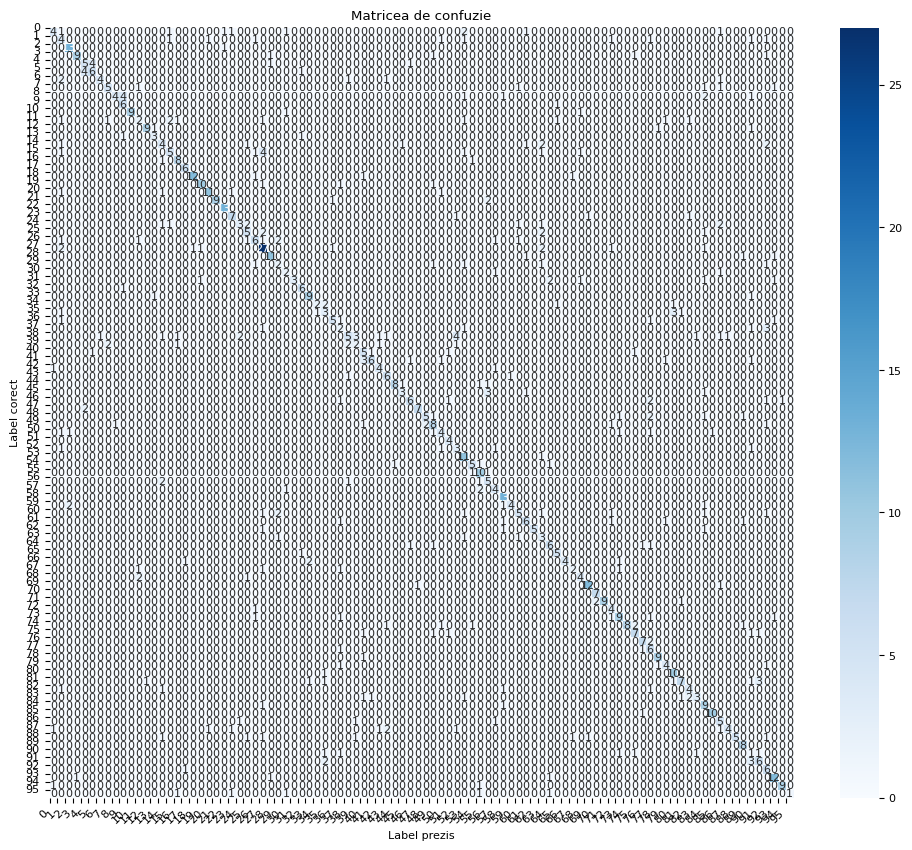

In [27]:
# Preziceri pentru imaginile de validare
predictions_val = model.predict(val_images)

predicted_labels_val = np.argmax(predictions_val, axis=1)

# Cream matricea de confuzie
con_mat = confusion_matrix(val_labels, predicted_labels_val)

plt.figure(figsize=(12, 10))

sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=True)

# Setam numele axelor si a tabelului
plt.xlabel('Label prezis')
plt.ylabel('Label corect')
plt.title('Matricea de confuzie')


classes = np.unique(val_labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes, rotation = 0)

plt.rcParams['font.size'] = 8

plt.show()